# Unsupervised Learning in R
Many times in machine learning, the goal is to find patterns in data without trying to make predictions. This is called unsupervised learning. One common use case of unsupervised learning is grouping consumers based on demographics and purchasing history to deploy targeted marketing campaigns. Another example is wanting to describe the unmeasured factors that most influence crime differences between cities. This course provides a basic introduction to clustering and dimensionality reduction in R from a machine learning perspective, so that you can get from data to insights as quickly as possible.

## Unsupervised learning in R
The k-means algorithm is one common approach to clustering. Learn how the algorithm works under the hood, implement k-means clustering in R, visualize and interpret the results, and select the number of clusters when it's not known ahead of time. By the end of the chapter, you'll have applied k-means clustering to a fun "real-world" dataset!

### k-means clustering
We have created some two-dimensional data and stored it in a variable called x in your workspace.

In this exercise, your task is to create a k-means model of the x data using 3 clusters, then to look at the structure of the resulting model using the summary() function.

In [5]:
# define x (a random 2*100 array)
x = replicate(2, rnorm(100))

# Create the k-means model: km.out
km.out = kmeans(x, centers = 3, nstart = 20)

# Inspect the result
summary(km.out)




             Length Class  Mode   
cluster      100    -none- numeric
centers        6    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

### Results of kmeans()
The kmeans() function produces several outputs. In the video, we discussed one output of modeling, the cluster membership.

In this exercise, you will access the cluster component directly. This is useful anytime you need the cluster membership for each observation of the data used to build the clustering model. A future exercise will show an example of how this cluster membership might be used to help communicate the results of k-means modeling.

k-means models also have a print method to give a human friendly output of basic modeling results. This is available by using print() or simply typing the name of the model.

In [6]:
# Print the cluster membership component of the model
print(km.out$cluster) 

# Print the km.out object
print(km.out)

  [1] 2 3 1 2 1 1 3 2 1 3 1 3 1 1 3 2 2 2 1 3 1 2 3 3 3 3 2 3 1 1 2 3 3 1 2 2 3
 [38] 1 1 1 1 1 1 2 3 2 1 3 3 2 3 3 1 1 3 3 2 2 2 2 3 2 2 2 2 3 1 2 1 1 1 1 2 1
 [75] 3 1 3 2 1 1 2 3 1 1 3 1 1 1 3 2 1 1 2 3 2 3 3 2 2 1
K-means clustering with 3 clusters of sizes 38, 31, 31

Cluster means:
        [,1]        [,2]
1  1.0633649  0.07818077
2 -0.7150690  0.77428699
3 -0.4378343 -1.05403454

Clustering vector:
  [1] 2 3 1 2 1 1 3 2 1 3 1 3 1 1 3 2 2 2 1 3 1 2 3 3 3 3 2 3 1 1 2 3 3 1 2 2 3
 [38] 1 1 1 1 1 1 2 3 2 1 3 3 2 3 3 1 1 3 3 2 2 2 2 3 2 2 2 2 3 1 2 1 1 1 1 2 1
 [75] 3 1 3 2 1 1 2 3 1 1 3 1 1 1 3 2 1 1 2 3 2 3 3 2 2 1

Within cluster sum of squares by cluster:
[1] 26.27351 29.34805 21.52251
 (between_SS / total_SS =  60.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


### Visualizing and interpreting results of kmeans()
One of the more intuitive ways to interpret the results of k-means models is by plotting the data as a scatter plot and using color to label the samples' cluster membership. In this exercise, you will use the standard plot() function to accomplish this.

To create a scatter plot, you can pass data with two features (i.e. columns) to plot() with an extra argument col = km.out$cluster, which sets the color of each point in the scatter plot according to its cluster membership.

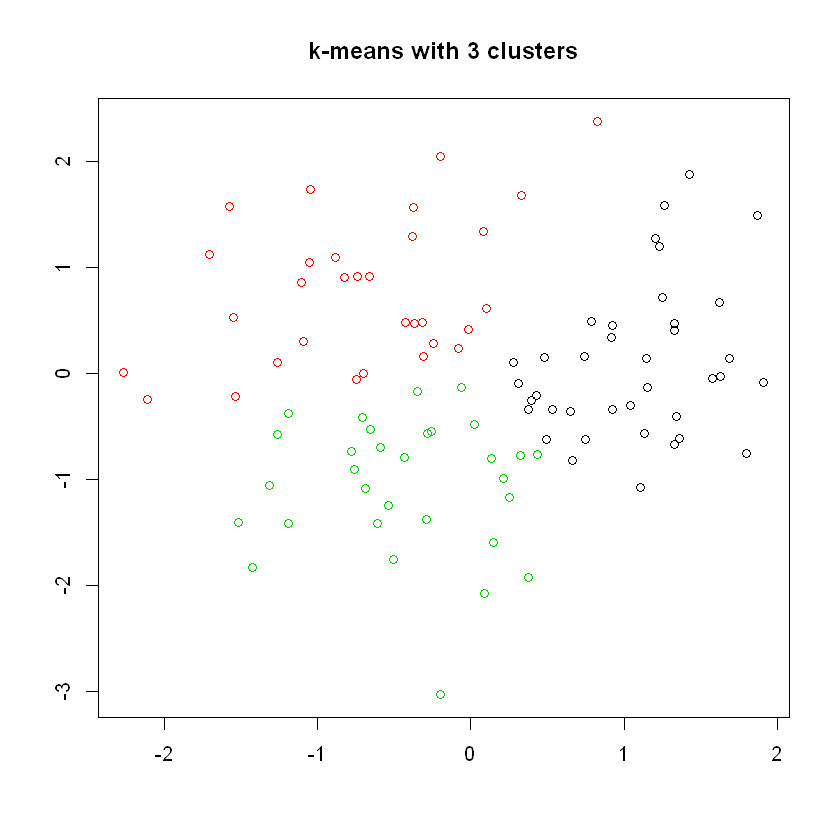

In [7]:
# Scatter plot of x
plot(x, col = km.out$cluster, main = "k-means with 3 clusters", xlab = "", ylab ="" )

### Handling random algorithms
In the video, you saw how kmeans() randomly initializes the centers of clusters. This random initialization can result in assigning observations to different cluster labels. Also, the random initialization can result in finding different local minima for the k-means algorithm. This exercise will demonstrate both results.

At the top of each plot, the measure of model quality—total within cluster sum of squares error—will be plotted. Look for the model(s) with the lowest error to find models with the better model results.

Because kmeans() initializes observations to random clusters, it is important to set the random number generator seed for reproducibility.

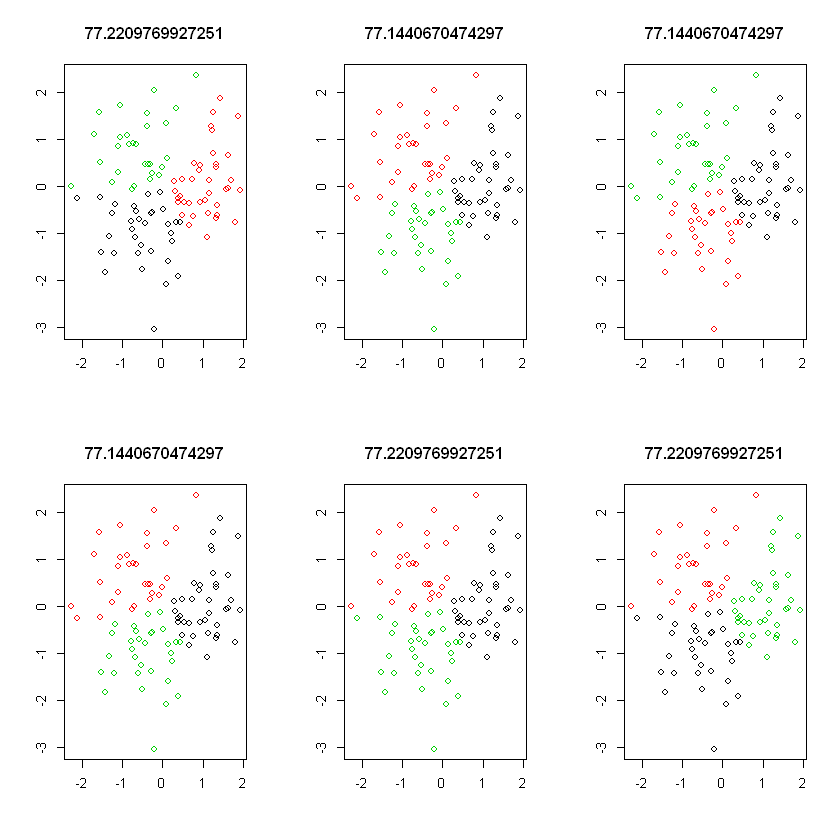

In [9]:
# Set up 2 x 3 plotting grid
par(mfrow = c(2, 3))

# Set seed
set.seed(1)

for(i in 1:6) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(x, centers = 3, nstart = 1)
  
  # Plot clusters
  plot(x, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}

### Selecting number of clusters
The k-means algorithm assumes the number of clusters as part of the input. If you know the number of clusters in advance (e.g. due to certain business constraints) this makes setting the number of clusters easy. However, as you saw in the video, if you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, you can observe how a measure of model quality changes with the number of clusters.

In this exercise, you will run kmeans() multiple times to see how model quality changes as the number of clusters changes. Plots displaying this information help to determine the number of clusters and are often referred to as scree plots.

The ideal plot will have an elbow where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the elbow indicates the number of clusters inherent in the data.

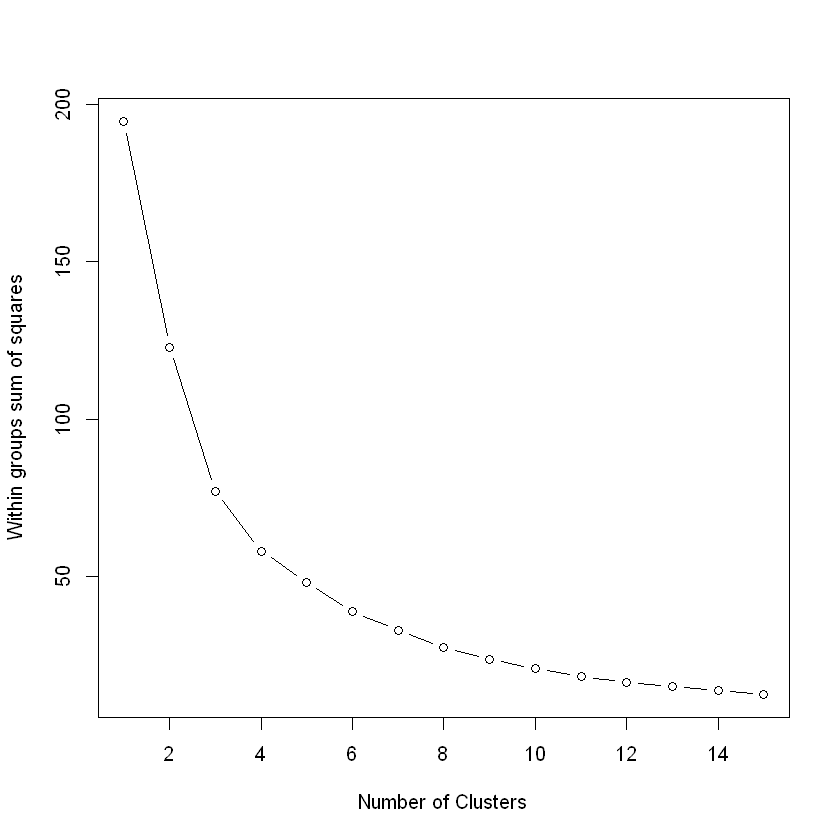

In [10]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(x, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")


### Practical matters: working with real data
Dealing with real data is often more challenging than dealing with synthetic data. Synthetic data helps with learning new concepts and techniques, but the next few exercises will deal with data that is closer to the type of real data you might find in your professional or academic pursuits.

The first challenge with the Pokemon data is that there is no pre-determined number of clusters. You will determine the appropriate number of clusters, keeping in mind that in real data the elbow in the scree plot might be less of a sharp elbow than in synthetic data. Use your judgement on making the determination of the number of clusters.

The second part of this exercise includes plotting the outcomes of the clustering on two dimensions, or features, of the data. These features were chosen somewhat arbitrarily for this exercise. Think about how you would use plotting and clustering to communicate interesting groups of Pokemon to other people.

An additional note: this exercise utilizes the iter.max argument to kmeans(). As you've seen, kmeans() is an iterative algorithm, repeating over and over until some stopping criterion is reached. The default number of iterations for kmeans() is 10, which is not enough for the algorithm to converge and reach its stopping criterion, so we'll set the number of iterations to 50 to overcome this issue. To see what happens when kmeans() does not converge, try running the example with a lower number of iterations (e.g. 3). This is another example of what might happen when you encounter real data and use real cases.

Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,FALSE


HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed
45,49,49,65,65,45
60,62,63,80,80,60
80,82,83,100,100,80
80,100,123,122,120,80
39,52,43,60,50,65
58,64,58,80,65,80


K-means clustering with 4 clusters of sizes 114, 288, 283, 115

Cluster means:
  HitPoints    Attack   Defense SpecialAttack SpecialDefense     Speed
1  89.20175 121.09649  92.73684     120.45614       97.67544 100.44737
2  79.18056  81.31944  69.19097      82.01042       77.53125  80.10417
3  50.29682  54.03180  51.62898      47.90459       49.15548  49.74912
4  71.30435  92.91304 121.42609      63.89565       88.23478  52.36522

Clustering vector:
  [1] 3 2 2 1 3 2 2 1 1 3 2 2 1 3 3 2 3 3 2 2 3 3 2 1 3 2 3 2 3 2 3 2 3 4 3 3 2
 [38] 3 3 2 3 2 3 2 3 2 3 2 3 2 2 3 4 3 2 3 2 3 2 3 2 3 2 3 1 3 3 2 3 2 2 1 3 2
 [75] 4 3 2 2 3 2 3 4 4 2 2 3 4 4 3 2 3 3 2 3 2 3 2 3 4 3 2 2 1 4 3 2 3 4 3 2 3
[112] 2 3 4 2 4 3 3 4 3 4 2 2 2 1 3 2 3 2 3 2 2 2 2 2 2 4 1 2 3 2 1 2 3 3 2 2 1
[149] 2 3 4 3 4 2 1 2 1 1 1 3 2 1 1 1 1 1 3 2 2 3 2 2 3 2 2 3 2 3 2 3 2 3 3 2 3
[186] 2 3 3 3 3 2 3 2 3 3 2 1 4 3 2 4 2 3 3 2 3 3 2 2 3 4 2 4 2 2 2 3 2 2 3 4 2
[223] 4 4 4 3 2 2 4 4 4 2 4 2 3 2 3 4 3 2 3 3 2 3 2 4 3 2 1 2 3 4 

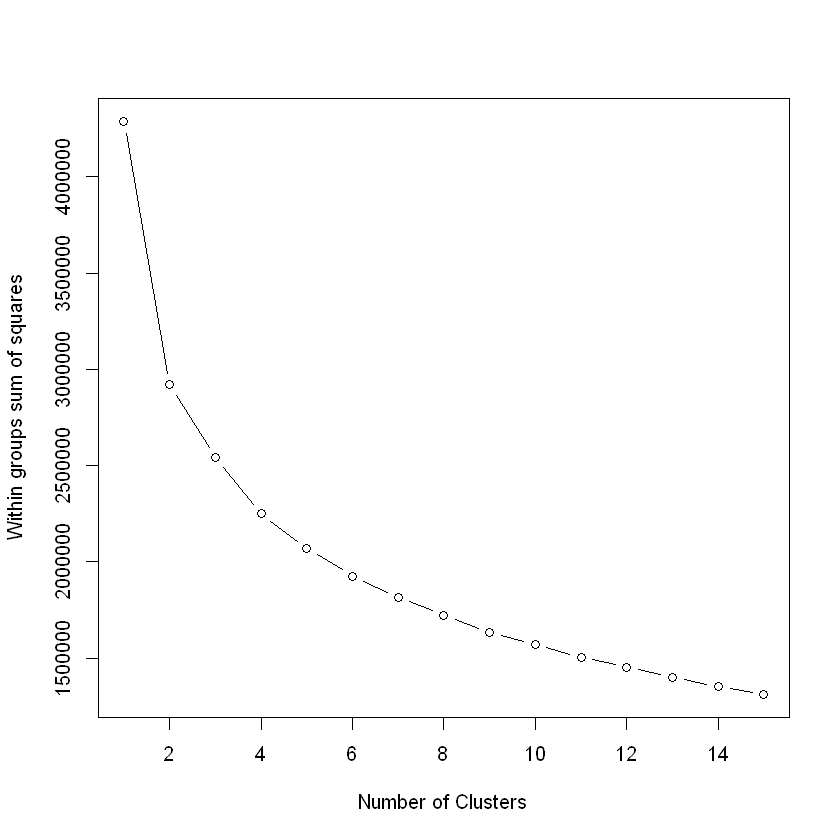

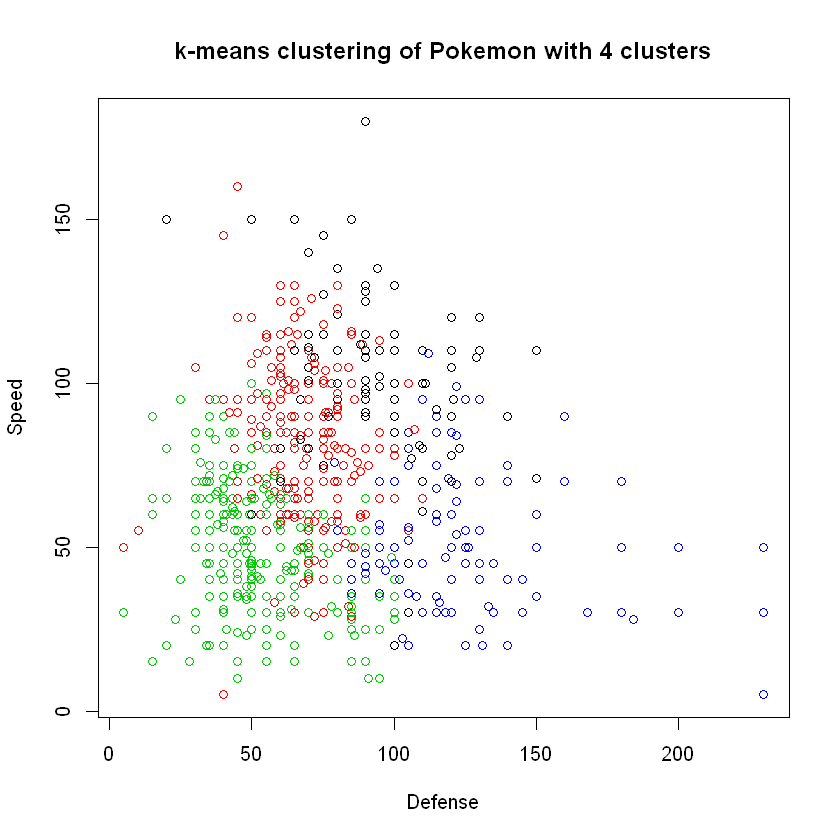

In [16]:
library(dplyr)
pokemon = read.csv("Pokemon.csv")

head(pokemon)

pokemonToAnalysis <- pokemon %>%
    select(HitPoints, Attack, Defense, SpecialAttack, SpecialDefense, Speed)

head(pokemonToAnalysis)

# Initialize total within sum of squares error: wss
wss <- 0

# Look over 1 to 15 possible clusters
for (i in 1:15) {
  # Fit the model: km.out
  km.out <- kmeans(pokemonToAnalysis, centers = i, nstart = 20, iter.max = 50)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Select number of clusters
k <- 4

# Build model with k clusters: km.out
km.out <- kmeans(pokemonToAnalysis, centers = k, nstart = 20, iter.max = 50)

# View the resulting model
km.out

# Plot of Defense vs. Speed by cluster membership
plot(pokemonToAnalysis[, c("Defense", "Speed")],
     col = km.out$cluster,
     main = paste("k-means clustering of Pokemon with", k, "clusters"),
     xlab = "Defense", ylab = "Speed")